# Prediction using Supervised Learning

Problem Statement:
    Create a simple linear regression model to predict the score a student can obtain by studying for 9.25 hours a day.

Done by: Shreya A

In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#Reading the dataset into a dataframe using Pandas

df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv',
                 sep=',')

In [3]:
#Checking the first 5 rows of the dataframe

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Text(0.5, 1.0, 'Hours Studied vs Student Scores')

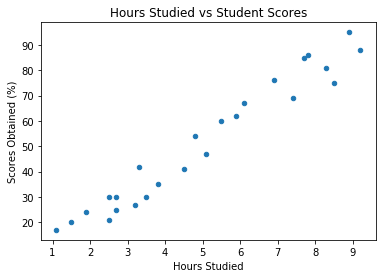

In [4]:
#Plotting the data to visualize any patterns

df.plot(x='Hours', y='Scores', kind='scatter', marker='o')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained (%)')
plt.title('Hours Studied vs Student Scores')

The scatter plot above displays that there is a positive relationship between the number of hours studied and the scores obtained.

# Running the Linear Regression Model

In [5]:
#Dividing the data into independent and dependent variables

X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [6]:
#Split the data into training and testing data with an 80:20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [7]:
#Instantiate a Linear Regression object
#Fit the Linear Regression Model

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5, 1.0, 'Hours Studied vs Student Scores')

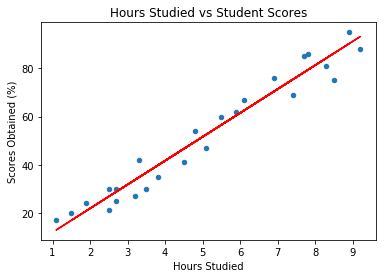

In [8]:
#Defining the regression line
line = reg.coef_*X + reg.intercept_

#Plotting the data with the regression line to visualize fit

df.plot(x='Hours', y='Scores', kind='scatter', marker='o')
plt.plot(X, line, color = 'red')

plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained (%)')
plt.title('Hours Studied vs Student Scores')

# Evaluation of Model Performance

In [9]:
#Comparing Actual Values to Predicted Values
y_pred = reg.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
#Using metrics to evaluate performance of the model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [11]:
#Evaluate the performance of the model by printing the R Square Value

print('The R Square value is:', reg.score(X_test, y_test))

The R Square value is: 0.9454906892105356


The R Square value signifies that our model has accurately fit 94.55% of the data.

# New Data Predictions

In [12]:
#Use the model to make predictions on new data

newscore = reg.predict([[9.25]])
print ('By studying for 9.25 hours/day, the predicted score = {}'.format(*newscore))

By studying for 9.25 hours/day, the predicted score = 93.69173248737538
